# Predicting heart disease using machine learning - python

The following steps will be done:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given the clinical information of a patient, can we predict if it has a heart disease or not?

## 2. Data

The original data came from Cleveland data from UCI Machine Learning Repository

## 3. Evaluation

The goal to be achieved
> If we can reach 95% accuracy at predicting wether ou not a patient has heart disease

## 4. Features

**Data Dictionary**
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * Value 1= typical angina
    * Value 2= atypical angina
    * Value 3= non-anginal pain
    * Value 4= asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0= normal
    * Value 1= having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0

## Preparing the tools

Will use Pandas, Matplotlib and NumPy for data analysis and manipulation

In [34]:
# Import all the tools

# ... default libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# ... shows plots inside notebook
%matplotlib inline 

# ... Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# ... model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration

Find as much as possible about the data we are working with

1. What questions we are wanting to answer?
2. What kind of data do we have and how we treat different types?
3. What's missing from the data and how we can deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of the data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

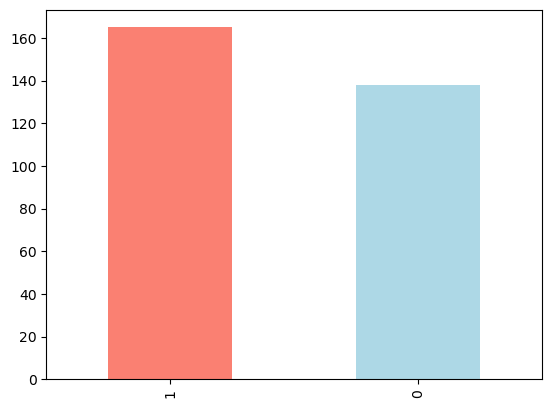

In [4]:
# Figure out how many of each class there are
df["target"].value_counts().plot(kind="bar", 
                                 color=["salmon", "lightblue"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding patterns

In [19]:
# Heart Disease according to sex (0 - female, 1 - male)
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [22]:
pd.crosstab(df.target, df.sex)

# More probability cases of heart diseases cases in women

sex,0,1
target,,
0,24,114
1,72,93


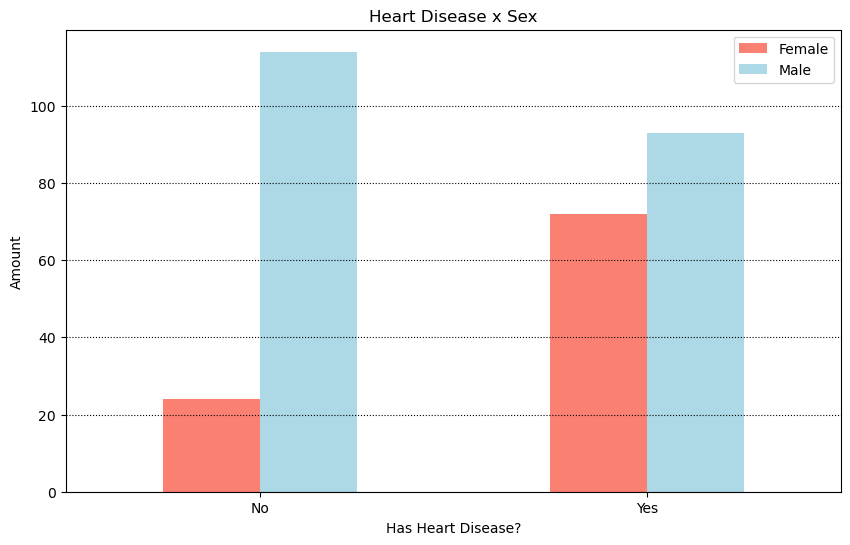

In [37]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"]);
plt.title("Heart Disease x Sex")
plt.xlabel("Has Heart Disease?")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(ticks=[0, 1],
           labels=["No","Yes"],
           rotation=0);
plt.grid(axis='y',
        ls=':',
        color='black',
        mouseover=True)

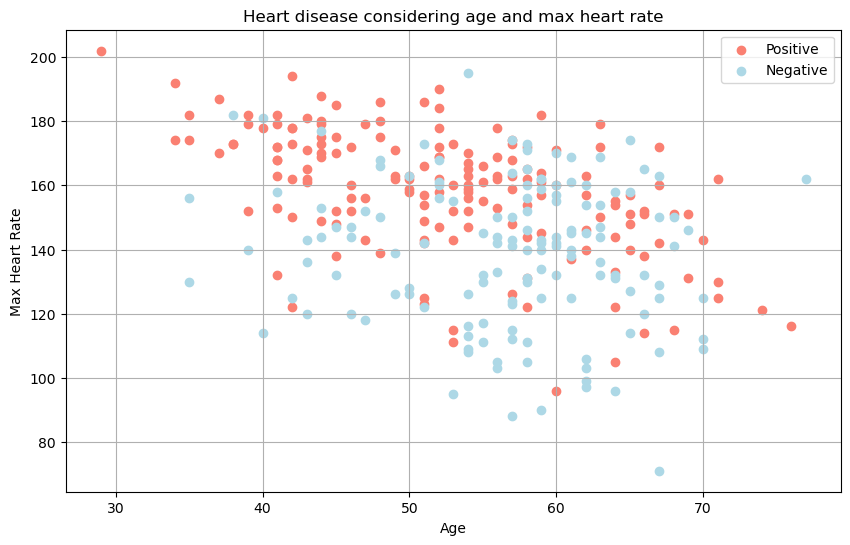

In [44]:
# Age vs Max Heart Rate for Heart Disease
plt.figure(figsize=(10,6))

# ... positive for heart disease
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

# ... negative for heart disease
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

plt.title("Heart disease considering age and max heart rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(["Positive","Negative"]);
plt.grid();

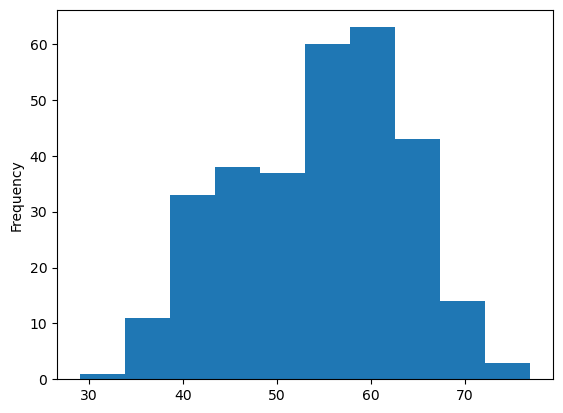

In [46]:
# Check distibution of the age column
df.age.plot.hist();

In [47]:
# Heart Disease Frequency according to chest pain type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


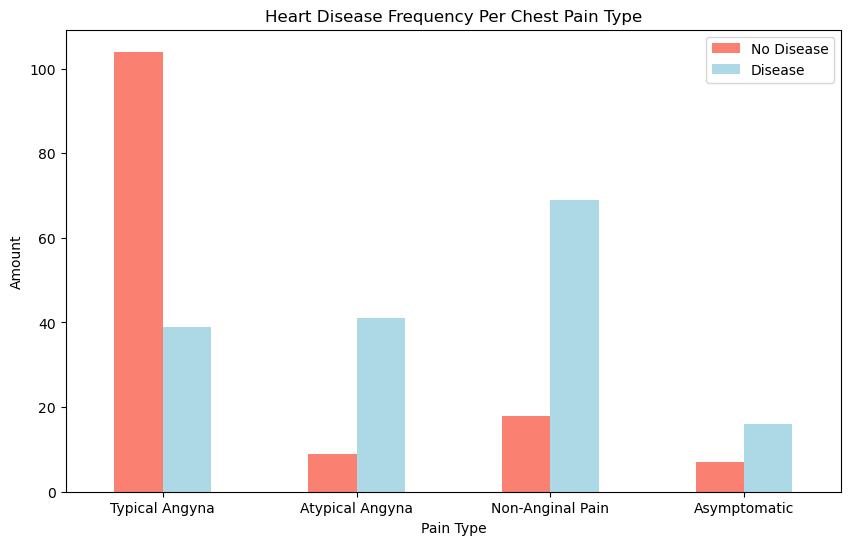

In [49]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(ticks=[0, 1, 2, 3],
           labels=["Typical Angyna",
                   "Atypical Angyna",
                   "Non-Anginal Pain",
                   "Asymptomatic"],
           rotation=0);

## Correlation Matrix

In [50]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


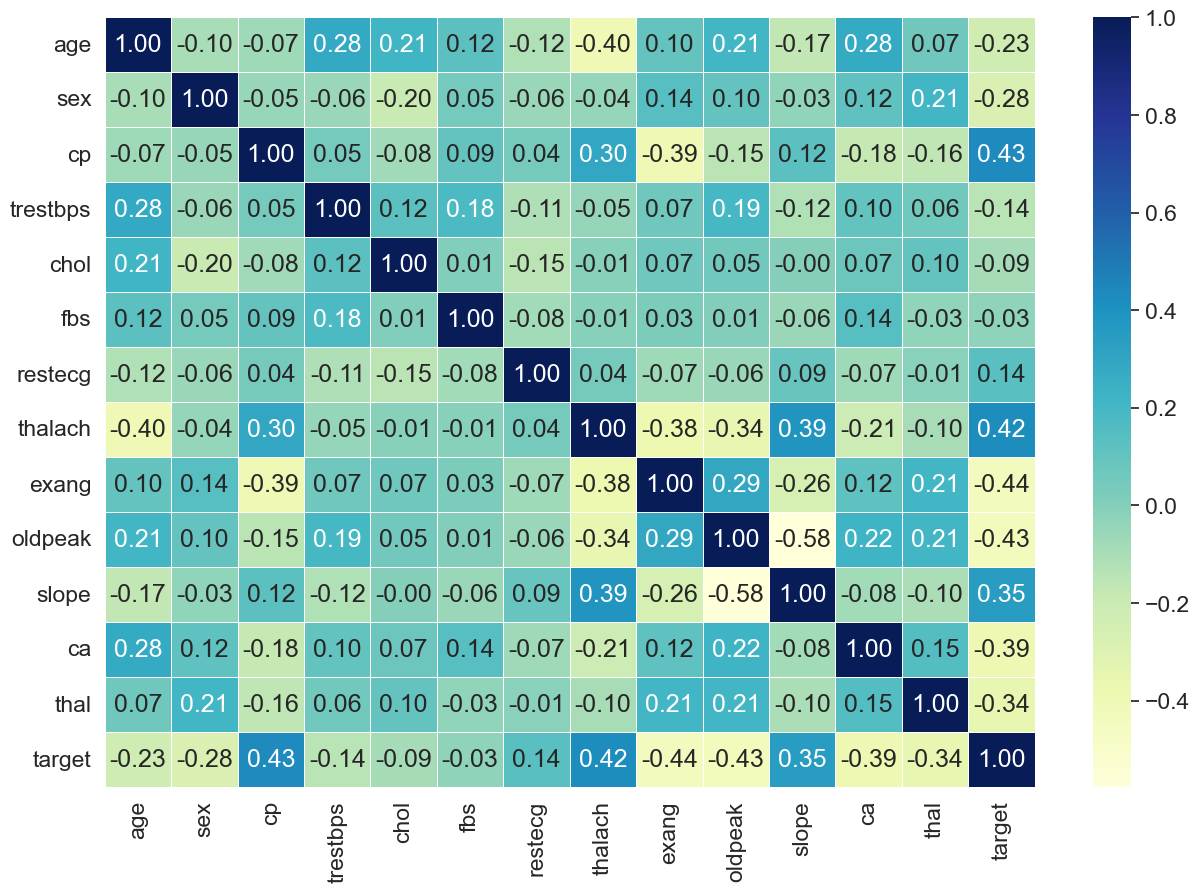

In [79]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True, 
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# 5. Modelling

In [8]:
np.random.seed(10)

X = df.drop("target",axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Testing Models based on SciKit-Learn Library image

3 tests will be testes based on the scikit-learn model selection image
1. LogisticRegression
2. K-NearestNeighbors
3. RandomForestClassifier

In [9]:
#Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    
    models: dictionary with models
    X_train/X_test: Training and testing features datasets
    y_train/y_test: Training and testing targets datasets
    """
    np.random.seed(10)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [10]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

model_score = fit_and_score(models=models, 
              X_train=X_train, 
              X_test=X_test, 
              y_train=y_train, 
              y_test=y_test)
model_score

C:\Users\User\Desktop\George\Cursos\Python and ML\Projetos\Milestone 1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8032786885245902}

## Model comparison

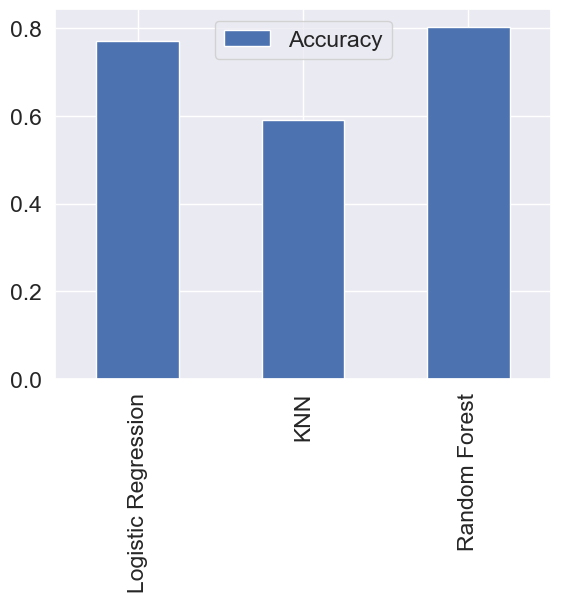

In [11]:
model_compare = pd.DataFrame(model_score, index=["Accuracy"])
model_compare.T.plot.bar();

With the baseline model, it is needed to stress out the models and check which is the best and gets a report/confusion matrix to prove

To do:
* Hyperparameters tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under the curve

### Hyperparameters Tuning - Manual

In [114]:
# Tuning KNN
np.random.seed(10)

train_scores = []
test_scores = []

num_neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in num_neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 72.13%


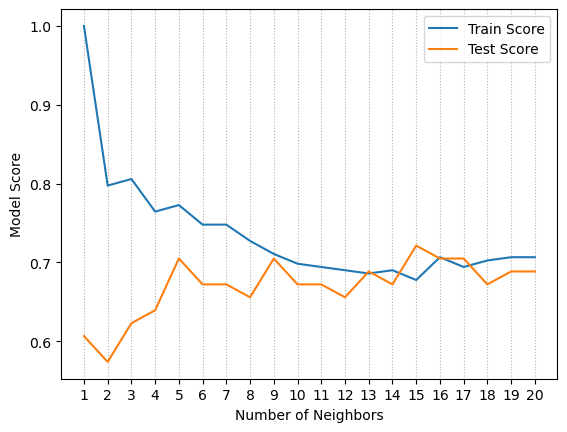

In [119]:
plt.plot(num_neighbors, train_scores, label="Train Score")
plt.plot(num_neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.grid(axis='x', linestyle = ":")

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameters Tuning - With RandomizedSearchCV

* Logistic Regression
* Random Forest Classifier

In [134]:
# Grids of hyperparameters
# ... Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# ... Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [130]:
np.random.seed(10)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [131]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [132]:
rs_log_reg.score(X_test, y_test)

0.7868852459016393

In [136]:
np.random.seed(10)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [137]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [138]:
rs_rf.score(X_test, y_test)

0.8360655737704918

### Hyperparameters Tuning - With GridSearchCV

* Logistic Regression
* Random Forest Classifier

In [12]:
# Grids of hyperparameters
# ... Logistic Regression
log_reg_grid = {"C": np.logspace(-1, 1, 30),
                "solver": ["liblinear"]}

# ... Random Forest Classifier
rf_grid = {"n_estimators": np.arange(50, 200, 10),
           "max_depth": [1, 3, 5],
           "min_samples_split": np.arange(2, 12, 2),
           "min_samples_leaf": np.arange(1, 5, 1)}

In [13]:
np.random.seed(10)

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 0.1       ,  0.11721023,  0.13738238,  0.1610262 ,  0.18873918,
        0.22122163,  0.25929438,  0.30391954,  0.35622479,  0.41753189,
        0.48939009,  0.57361525,  0.67233575,  0.78804628,  0.92367086,
        1.08263673,  1.268961  ,  1.48735211,  1.74332882,  2.04335972,
        2.39502662,  2.8072162 ,  3.29034456,  3.85662042,  4.52035366,
        5.29831691,  6.21016942,  7.27895384,  8.53167852, 10.        ]),
                         'solver': ['liblinear']},
             verbose=True)

In [14]:
gs_log_reg.best_params_

{'C': 0.2212216291070449, 'solver': 'liblinear'}

In [15]:
gs_log_reg.score(X_test, y_test)

0.7704918032786885

## Evaluating the Model

**Confusion Matrix**

**ROC Curve**

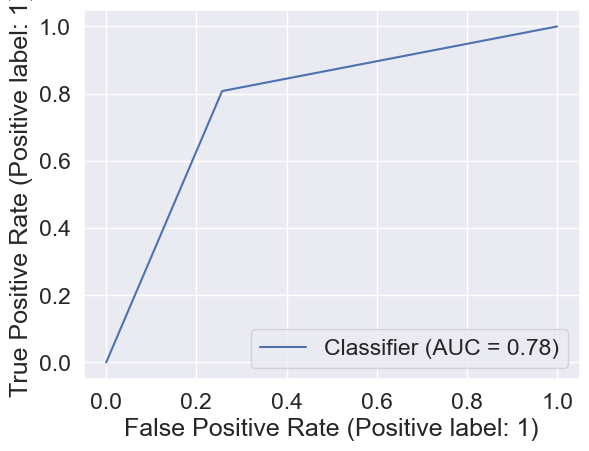

In [43]:
display = RocCurveDisplay.from_predictions(y_test, y_preds)

**Confusion Matrix**

In [44]:
print(confusion_matrix(y_test, y_preds))

[[26  9]
 [ 5 21]]


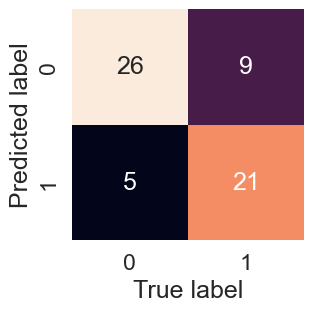

In [45]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label") # predictions go on the x-axis
    plt.ylabel("Predicted label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

**Classification Report**

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



**Using cross-validation**

In [51]:
# Cross validated accuracy
cv_acc = cross_val_score(gs_log_reg,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy");
cv_acc

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.83606557, 0.90163934, 0.86885246, 0.86666667, 0.75      ])

In [52]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446448087431694

In [53]:
  # Cross validated precision
cv_precision = cross_val_score(gs_log_reg,
                         X,
                         y,
                         cv=5,
                         scoring="precision");
cv_precision  

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.7804878 , 0.88571429, 0.85714286, 0.85714286, 0.725     ])

In [54]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8210975609756097

In [55]:
  # Cross validated recall
cv_recall = cross_val_score(gs_log_reg,
                         X,
                         y,
                         cv=5,
                         scoring="recall");
cv_recall  

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.96969697, 0.93939394, 0.90909091, 0.90909091, 0.87878788])

In [56]:
cv_recall = np.mean(cv_recall)
cv_recall 

0.9212121212121213

In [58]:
# Cross validated f1_score
cv_f1 = cross_val_score(gs_log_reg,
                         X,
                         y,
                         cv=5,
                         scoring="f1");
cv_f1 

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.86486486, 0.91176471, 0.88235294, 0.88235294, 0.79452055])

In [59]:
cv_f1= np.mean(cv_f1)
cv_f1

0.8671712002090729

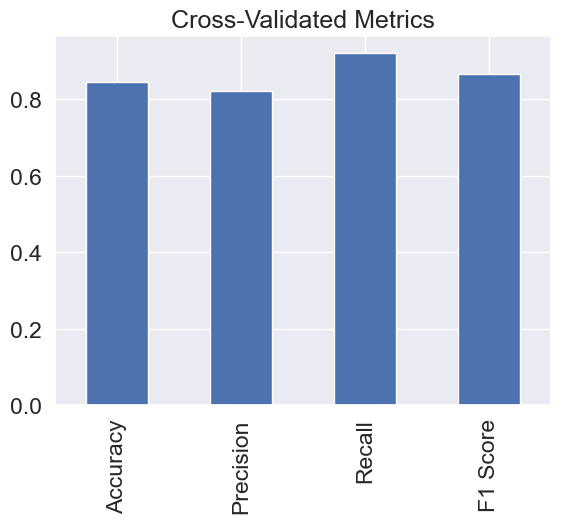

In [62]:
#Visualize Corss Validate metric

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1 Score": cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Metrics',
                      legend=False);

**Feature Importance**

In [63]:
gs_log_reg.best_params_

{'C': 0.2212216291070449, 'solver': 'liblinear'}

In [65]:
clf = LogisticRegression(C= 0.2212216291070449, 
                         solver= 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.2212216291070449, solver='liblinear')

In [66]:
#How much each index impacts the prediction
clf.coef_

array([[ 0.00743651, -1.011716  ,  0.68706784, -0.01808643, -0.0047223 ,
        -0.05052939,  0.17797548,  0.03108987, -0.49466306, -0.32829544,
         0.44495657, -0.79708853, -0.42646043]])

In [69]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0074365106561554845,
 'sex': -1.011715999084391,
 'cp': 0.6870678447479425,
 'trestbps': -0.018086431755722134,
 'chol': -0.0047223046796319975,
 'fbs': -0.050529393241504295,
 'restecg': 0.17797547513933007,
 'thalach': 0.031089869889269844,
 'exang': -0.4946630615218008,
 'oldpeak': -0.3282954424762964,
 'slope': 0.44495656662768474,
 'ca': -0.7970885299974149,
 'thal': -0.4264604320243522}

<Axes: title={'center': 'Feature Importance'}>

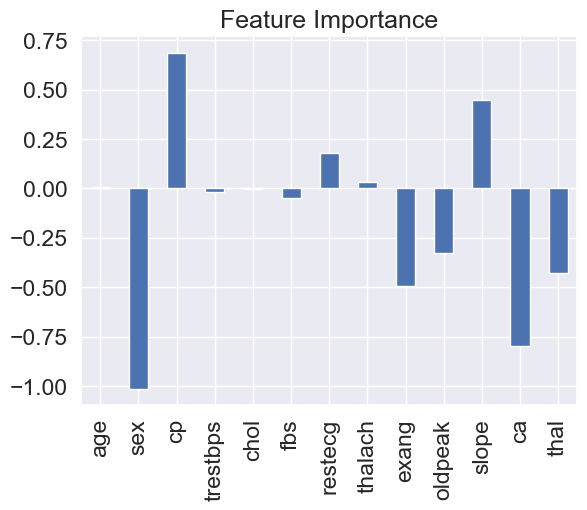

In [78]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [80]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [81]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experimentation

What to do if we do not have achieved the goal...
* Collect more data?
* Try a better model? (CatBoost or XGBoost)
* Improve the actual model?

If the model is good enough...
* Save and export it to share with others